<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/PyTorch/5_CustomDataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Custom Datasets

In [41]:
import torch as pt
from torch import nn

pt.__version__

'2.5.1+cu121'

In [42]:
device = 'cuda' if pt.cuda.is_available() else 'cpu'
device

'cpu'

In [43]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


We are using a subset of the Food101 Dataset

### Getting the data

In [44]:
import requests as req
import zipfile
from pathlib import Path

# Setting up the folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# If Img do not exist then download it and prepare it
if image_path.is_dir():
    print(f'{image_path} dir already exits ...')
else :
    print(f'{image_path} is being created')
    image_path.mkdir(parents= True, exist_ok = True)

with open(data_path/ 'pizza_steak_sushi.zip', 'wb') as f:
    reqs = req.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print("Downloading the data")
    f.write(reqs.content)

# Unzipping the data
with zipfile.ZipFile('/content/data/pizza_steak_sushi.zip', 'r') as f:
    print("Unzipping the data")
    f.extractall(image_path)

data/pizza_steak_sushi dir already exits ...
Unzipping the data


Data Prepration and Exploration

In [45]:
import os
def walk_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} Dir + {len(filenames)} images in {dirpath}")

walk_dir(data_path)

There are 1 Dir + 1 images in data
There are 2 Dir + 0 images in data/pizza_steak_sushi
There are 3 Dir + 0 images in data/pizza_steak_sushi/test
There are 0 Dir + 25 images in data/pizza_steak_sushi/test/pizza
There are 0 Dir + 19 images in data/pizza_steak_sushi/test/steak
There are 0 Dir + 31 images in data/pizza_steak_sushi/test/sushi
There are 3 Dir + 0 images in data/pizza_steak_sushi/train
There are 0 Dir + 78 images in data/pizza_steak_sushi/train/pizza
There are 0 Dir + 75 images in data/pizza_steak_sushi/train/steak
There are 0 Dir + 72 images in data/pizza_steak_sushi/train/sushi


In [46]:
# Setting up the train and test path
train_path = image_path / 'train'
test_path = image_path / 'test'

### Vizualizing the images

In [47]:
import random
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))
len(image_path_list)

300

In [48]:
random_img_path = random.choice(image_path_list)
random_img_path

PosixPath('data/pizza_steak_sushi/train/pizza/1089334.jpg')

In [49]:
# Image class is the path name
image_class = random_img_path.parent.stem
image_class

'pizza'

Path : data/pizza_steak_sushi/train/pizza/1089334.jpg, 
class : pizza, 
height : 288, 
width : 512


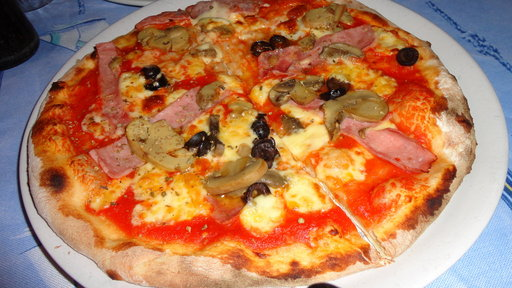

In [50]:
img = Image.open(random_img_path)

# Printing the Meta Data of the image
print(f"Path : {random_img_path}, \nclass : {image_class}, \nheight : {img.height}, \nwidth : {img.width}")

img

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Class : pizza | shape : (288, 512, 3)')

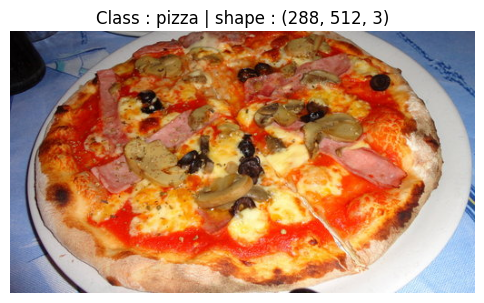

In [52]:
img_as_array = np.asarray(img)

# Plotting the image using matplot lib
plt.figure(figsize = (6, 6))
plt.imshow(img_as_array)
plt.axis(False)
plt.title(f"Class : {image_class} | shape : {img_as_array.shape}")

### Transformin the data

In [53]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [54]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [55]:
data_transform(img).dtype

torch.float32

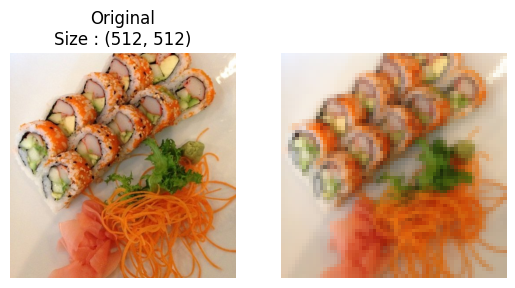

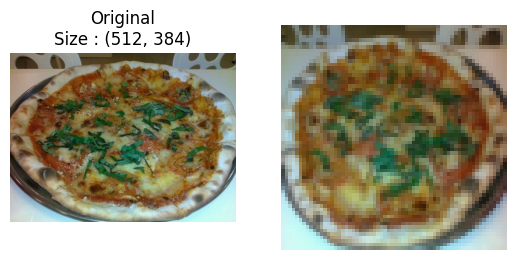

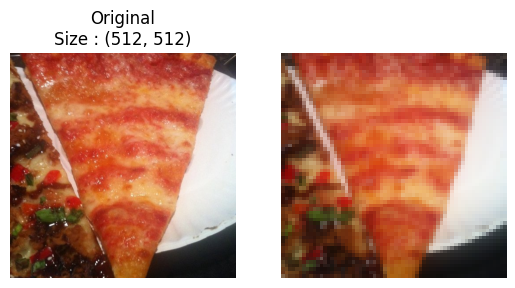

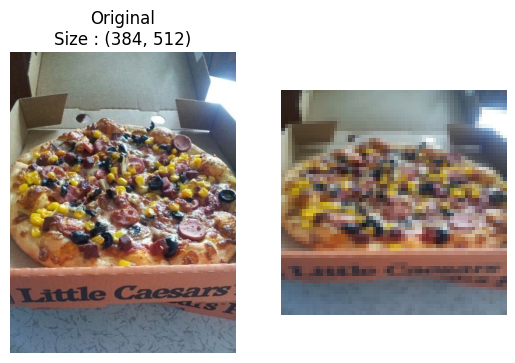

In [56]:
def plot_transformed_img(img_paths, transform, n = 3, seed = None):
    if seed :
        random.seed(seed)

    rand_img_paths= random.sample(img_paths, k = n)
    for img_path in rand_img_paths :
        with Image.open(img_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize : {f.size}')
            ax[0].axis(False)

            # Tansformed and plot target
            transformed_img = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_img)
            # ax[1].set_title(f'Transformed\nSize : {transformed_img.size}')
            ax[1].axis(False)

            # plt.suptitle(f"Class : {img_path.parent.stem}", fontsize = 15)

plot_transformed_img(image_path_list, data_transform, n = 4, seed = 42)

In [57]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform,
                                  target_transform= None)
test_data = datasets.ImageFolder(root = train_path,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [58]:
train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [59]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [60]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

We can also use DataLoader for the same task of loading the images and utilizing it

Model0 -> TinyVGG Without Data Augmentation

In [61]:
# Setting up the batch size and the other
batch_size = 32
num_cpu = os.cpu_count()
num_cpu

2

In [62]:
train_DataLoader = DataLoader(
    dataset= train_data,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_cpu
)
test_DataLoader = DataLoader(
    dataset= test_data,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_cpu
)

train_DataLoader, test_DataLoader

(<torch.utils.data.dataloader.DataLoader at 0x79ed2712d150>,
 <torch.utils.data.dataloader.DataLoader at 0x79ed2712cd30>)

In [63]:
# Maknig the model

class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape) :
        super().__init__()

        self.Conv1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.Conv2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.Classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16*16,
                      output_shape)
        )

    def forward(self, x):
        x = self.Conv1(x)
        x = self.Conv2(x)
        x = self.Classifier(x)

        return x

In [64]:
pt.manual_seed(42)

model0 = TinyVGG(3, 10, len(class_names)).to(device)
model0

TinyVGG(
  (Conv1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [65]:
try:
    from torchinfo import summary
except :
    !pip install torchinfo -q
    from torchinfo import summary

In [66]:
summary(model0, input_shape = [32, 3, 64, 64])

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0

### Creating the trining and the testing loop
- `train_step()`
- `test_step()`

In [67]:
def train_step(model, data_loader, loss_fn, optimizer, device = 'cpu'):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (x, y) in enumerate(data_loader):
        x, y = x.to(device), y.to(device)

        y_pred = model(x)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = pt.argmax(pt.softmax(y_pred, dim = 1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss /= len(data_loader)
    train_acc  /= len(data_loader)

    return train_loss, train_acc

In [68]:
def test_step(model, data_loader, loss_fn, device='cpu'):
    model.eval()

    test_loss, test_acc = 0, 0
    with pt.inference_mode() :
        for batch, (x, y) in enumerate(data_loader):
            x, y = x.to(device), y.to(device)

            test_pred = model(x)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_label = test_pred.argmax(dim = 1)
            test_acc += (test_label == y).sum().item()/len(test_pred)

    test_loss = test_loss / len(data_loader)
    test_acc = test_acc / len(data_loader)

    return test_loss, test_acc

#### Trian() to combine train_step() test_step()

In [69]:
from tqdm.auto import tqdm

def train(model, train_loader, test_loader, optimizer, loss_fn, epochs : int = 5, device = 'cpu'):
    result = {'train_loss' : [], 'train_acc': [], 'test_loss': [], 'test_acc': []}

    for ep in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_loader, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, test_loader, loss_fn, 'cpu')

        print(f"Epoch {ep} | Train Loss {train_loss : .4f} | Train Acc {train_acc : .4f} | Test Loss {test_loss : .4f} | Test Acc {test_acc : .4f}")

        result['test_acc'].append(test_acc)
        result['test_loss'].append(test_loss)
        result['train_acc'].append(train_acc)
        result['train_loss'].append(train_loss)

Training and Evaluating the model

In [70]:
pt.manual_seed(42)
pt.cuda.manual_seed(42)

epochs = 25

model0 = TinyVGG(input_shape = 3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(params = model0.parameters(), lr = 0.01)

In [71]:
from timeit import default_timer as tim

st_time = tim()

model0_res = train(model0, train_DataLoader, test_DataLoader, optimizer, loss_fn, epochs)
end_time = tim()

f'Total Training time : {end_time - st_time : .3f} seconds'

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0 | Train Loss  1.2470 | Train Acc  0.2617 | Test Loss  1.0970 | Test Acc  0.3047
Epoch 1 | Train Loss  1.1029 | Train Acc  0.3242 | Test Loss  1.1002 | Test Acc  0.2930
Epoch 2 | Train Loss  1.0976 | Train Acc  0.4141 | Test Loss  1.0973 | Test Acc  0.4141
Epoch 3 | Train Loss  1.1043 | Train Acc  0.2930 | Test Loss  1.1036 | Test Acc  0.2930
Epoch 4 | Train Loss  1.0966 | Train Acc  0.4141 | Test Loss  1.1002 | Test Acc  0.2930
Epoch 5 | Train Loss  1.1005 | Train Acc  0.2930 | Test Loss  1.1023 | Test Acc  0.2930
Epoch 6 | Train Loss  1.1044 | Train Acc  0.2930 | Test Loss  1.0947 | Test Acc  0.4141
Epoch 7 | Train Loss  1.1026 | Train Acc  0.2930 | Test Loss  1.1021 | Test Acc  0.2930
Epoch 8 | Train Loss  1.0969 | Train Acc  0.3906 | Test Loss  1.0968 | Test Acc  0.4258
Epoch 9 | Train Loss  1.0996 | Train Acc  0.3047 | Test Loss  1.1006 | Test Acc  0.3047
Epoch 10 | Train Loss  1.1025 | Train Acc  0.3047 | Test Loss  1.1023 | Test Acc  0.3047
Epoch 11 | Train Loss  1.0982 |

'Total Training time :  74.261 seconds'